# <center>An Elementary Particle Collider Signal Filter</center>
#### <center> Developed by Luke Surber, SurberL9@uw.edu </center>

### README: 

### This notebook was originally aimed at modeling the luminosity and particle distributions of particles traveling in a collider, the aim now is to demonstrate the process of filtering out any noise from a signal using Python code and ML techniques. In High Energy Physics (HEP), very often the problem of seperating signal from backgroundnoise arises; some scenario include resonant peaks from particle decays (focus of this nb), physics object reconstruction/identification (id est pions, photons, electrons, b(t)-jets...), nuclear interactions with detector materials, photon conversions with detector material, all of these phenomena would be combined with noise. The example scenario used in this notebook is the Higgs boson decay, it's resonant peak occurs at ~125 GeV, we're assuming an STD of 20 GeV (Revisit this later...); this signal is 'dirtied' in two ways, first there's an additional background signal(s) (calling it background noise) that has a gaussian distribution (sigma=30GeV,mu=30GeV)(will add more peaks later to represent other particle resonances), and second there's an overall random noise that 'dirties' the signal further (mechanical, electrical,...). All of these sources of noise need to be filtered out, this is our goal.
##### NOTE: run a cell with "!pip install --upgrade jax jaxlib" for systems that haven't installed JAX yet.

### Initial Attempt: 
### Upon measuring and recording data for the Higgs Boson resonance, the process of filtering out the noise therein naturally arises. The dataset would have two kinds of values, the bin values which span an amount of energy (1 GeV in this nb's case), and the event counts that correspond to those specific bins (bin values). In the notation below, the bin value for bin $m$ is $x_m$, and the event count for that specific bin is $y_m$.
### This data set needs to be filtered of noise and in doing so return the parameters that would define the signal representing the Higgs Boson resonance. The inital approach will be done in two steps: first using the Signal to Noise Ratio and second using the method of least squares on the following cost function, $\Omega(\sigma,\mu)$. 
### The goal is to obtain the best fit values for the parameters $\sigma$ and $\mu$, which represent the Higgs distributions standard deviation (std) and median (peak) respectively; ideally these values would be the exact values we used to create the signal distribution to begin with. I define the vector $\beta$ as one with two components, $\sigma$ and $\mu$, this way I simplify my goal to finding the best fit vector, $\beta_*$, that has components about or equal to the Higgs distribution parameters. 

### In this initial attempt, the first step would be to apply the Signal to Noise Ratio method, this method finds a value for energy that corresponds to a bin that, if the events in all bins of equal or lower energy are removed from the data, then the remaining data contains the most signal and the least noise (id est signals from lower energy particle resonances). After doing this the data will be ready for the cost function optimization, allowing for the best fit vector, $\beta_*$, to be found.
### The next step is to apply the least-squares method to find those best fit parameters that most accurately fit the Higgs Boson signal, while supressing/ignoring the remnant counts from lower energy resonance peaks of other particles (reffered to as noise from here on), as well as overall random noise; in otherwords, find $\beta_*$. 
### The vector $\beta_*$ can be solved for by finding the global minimum in the cost function, $\Omega(\sigma,\mu)$ , using the least-squares method. <center>$\Omega=\sum_{i=1}^{m}r_{i}^{2}$.</center> The residual $r_i$ is simply the difference between the event count in the bin and the gaussian function $f(x_i,\beta)$, <center>$r_i=y_i-f(x_i,\beta)$, where $f(x_i,\beta)=f(x,\beta_1=\sigma,\beta_2=\mu)=\dfrac{1}{\sigma\sqrt{2\pi}}e^{-\dfrac{(x_i-\mu)^2}{\sigma^2}}$.</center> Thus the cost function has the form, <center> $\Omega=\sum_{i=1}^{m}\left(y_i-\dfrac{e^{-\dfrac{(x_i-\mu)^2}{\sigma^2}}}{\sigma\sqrt{2\pi}}\right)^{2}$. </center>
### The shape of $\Omega$ as a function of $\beta$ should be (and is) concave, with the global minimum here corresponding to $\beta_*$, the best fit parameters in otherwords, these values ideally should converge to the Higgs distribution parameters.
### The motivation in implementing the least-squares method on the cost function, $\Omega(\hat\beta)$, is to find $\beta_*$.
### To accomplosh this, the gradient of the cost function can be set to ~zero, providing two linearly independent equations that can be solved for the components of $\beta_*$, $\sigma_*$ and $\mu_*$.
### <center> $\dfrac{\partial\Omega}{\partial\beta_j}=2\sum_{i}r_{i}\dfrac{\partial r_i}{\partial\beta_j}=0$,   where $j=[1,2],{\beta}_j=[\sigma,\mu]$ </center>
### <center> $\dfrac{\partial\Omega}{\partial\beta_1}=\dfrac{\partial\Omega}{\partial\sigma}=2\sum_{i}r_{i}\dfrac{-\left(2 \mu ^2-\sigma ^2+2 x^2-4 \mu  x\right)}{\sqrt{2 \pi } \sigma ^4}e^{-\dfrac{(x-\mu )^2}{\sigma ^2}}$,</center> <center>$\dfrac{\partial \Omega}{\partial \beta_2}=\dfrac{\partial \Omega}{\partial \mu}=2\sum_{i}r_{i}\dfrac{-2 (x-\mu )}{\sqrt{2 \pi }\sigma ^3}e^{-\dfrac{(x-\mu )^2}{\sigma ^2}}$. </center>

### A slightly different approach to finding the best fit parameters, or rather approximating them, would be to implement gradient descent on the cost function, $\Omega(\beta)$, to get $\beta_*$. This method isn't exactly neccesary since it's possible to solve for $\beta_*$ explicitly because the cost function will have just one global minimum; however if the toydata were replaced with a real-world dataset one might find several minimas which would mean the gradient descent method might actually be required... 
### To perform gradient descent, an intial guess $\beta_{0}$ is needed, this would consist of a guess for the $\sigma$ and $\mu$ parameters of the model gaussian, a reasonable guess for $\mu$ would be the appararent maximum in the data set (the peak), and I'm currently unsure of the best way to choose an intiial $\sigma$ (!!!).
### Applying Gradient Descent to this Linear System allows for approximating optimal parameters, $\sigma$, and $\mu$.
### Using our cost function, $\Omega(\beta)$. The algorithm is as follows:
### <center>$\bf{\beta}_{n+1}=\bf{\beta}_n-\gamma\nabla \Omega(\bf{\beta}_n)$,</center>
### where $\bf{\beta}_{n=0}$ is our guess $\beta_{0}$, and $\gamma$ is the step size, $\gamma \in \mathbb {R} _{+}$; our choice of $\gamma$ should be small enough so that $\Omega(\bf{\beta}_n)\geq\Omega(\bf{\beta}_{n+1})$, the idea being the iterative algorithm should minimize the Cost function values until the approximate local minimum is found.
### The sequence of iterations are intended to "descend" the Omega data surface in descrete steps until the minimum (certainly the global minima in this specific case) is found, and the coordinates for this point will be denoted as $\beta_*$; to reiterate, the coordinates indicate the signal's best fit values. 

### Revisiting the Cost function: 
### We can increase the flexibility of the Cost function by implementing a discrete cut that isn't determine by the SNR method, and in doing so we find a low-energy cut that makes even more sense at the cost of a longer computation time.
### This 'dirtied' dataset needs to be filtered of noise and in doing so return the parameters that would most closely define the signal distribution that represents the Higgs Boson resonance. The approach will be done using a new cost function, $Z(x,y,\beta)$, where the vector $\beta$ is now a three-dimensional vector with components $(\sigma,\mu,\theta)$; the $x$ and $y$ terms in this notation are the bin energy values and the event counts for a specific bin are the respectively, the parameters $\sigma$, $\mu$, and $\theta$ represent the signal standard deviation (std), median (peak), and discrete low-energy cut respectively. The optimal low-energy cut is a discrete cut that maximizes the signal and minimizes the noise. The optimal STD and peak are the parameters that best best describe the Higgs signal distribution, after the low energy counts are truncated.
### I proceed from here on with the $Z$ function as the cost function, and at the end I'll compare the best fit parameters from all methods to determine which is superior.


In [1]:
import jax.numpy as jnp
import random as rand
import math, jax
import matplotlib.pyplot as plt
import numpy as np
import time
from ipywidgets import interact
from jax import grad, jit, vmap, random
from numpy import inf
from numpy import linalg as LA
key = random.PRNGKey(0)
plt.style.use('dark_background')

In [2]:
#########################################################################################
#                            Signal to Noise Ratio                                      #
#########################################################################################
def SNR(s, n): #Defining the Continuous SNR Function.
    snr, Srray, Nrray = [], [], []
    for i in range(len(s[0])):
#Below; Mathematical equivalent to a 'running' Riemann Sum or Definite Integration.
        N = 2.5 * jnp.nansum(n[0][:i+1])
        S = s[0][i+1]
        Srray.append(S)
        Nrray.append(N)
        N = np.sum(Nrray)
        r = S / N**2
#Below; Appropriately interpolates the datset with zeroes.        
        r = jnp.nan_to_num(r, nan=0.0, posinf=0.0)
        snr.append(r.item())
    return snr, Srray, Nrray
#Notes: TypeError appears when using jnp.sum here, the jnp version requires ndarray or scalar arguments.
#########################################################################################
#                             Toy Data Generation                                       #
#########################################################################################
#  Example Scenario: Higgs Boson has a 125 GeV Mass, assuming an arbitrary 20 GeV STD.  #
sig_events, nos_events, Emax = 10**5, 5*10**4, 250
sig_mean, nos_mean, sig_std, nos_std = 125, 30, 20, 30 
size, mean, cov, bins = sig_events, jnp.array([sig_mean,nos_mean]).block_until_ready(), jnp.array([[sig_std**2,0],[0,nos_std**2]]).block_until_ready(), Emax 
#Generating Two Gaussian Distributions that are used for the background noise and signal.
signal, noise = random.multivariate_normal(key, mean, cov, (size,)).T.block_until_ready()
signal, noise = signal[signal<250], noise[noise<100] #Implementing the bounds on the data.
#Combining the signal with both background nosie and random noise.
data_array = jnp.concatenate((signal,noise[:nos_events]))+np.random.normal(0,2.5,len(signal)+len(noise[:nos_events])) 
sig = jnp.histogram(signal, bins=bins, range=(0,250), density=False)
sign = jnp.histogram(signal, bins=bins, range=(0,250), density=True)
nos = jnp.histogram(noise, bins=bins, range=(0,100), density=False)
snr_dat, s, n = SNR(sig, nos)[:125][0], SNR(sig, nos)[:125][1], SNR(sig, nos)[:125][2]
snr_domain = jnp.arange(0,125,0.5)
optimal_cut = 2.5*round((snr_domain[snr_dat.index(jnp.nanmax(jnp.asarray(snr_dat)).item())].item())/2.5)
#Rounding here is neccesary to get the nearest bin value
cut_data_array = data_array[data_array > optimal_cut]
data_hist = jnp.histogram(data_array, bins=bins, range=(0,250), density=False)
data_histn = jnp.histogram(data_array, bins=bins, range=(0,250), density=True)
cut_data_hist = jnp.histogram(cut_data_array, bins=bins, range=(0,250), density=False) 
cut_data_histn = jnp.histogram(cut_data_array, bins=bins, range=(0,250), density=True);

In [3]:
##########################################################################################
#                                Latest Version                                          #
##########################################################################################

### denote here what x,y,beta,b1,b2,X,Y,Omega,g1,g2,g,h,l,logg,ect all mean
### denote here the naming convention for the below functions and objects; id est functions have several capitals and objects only have one...

b1 = jnp.arange(10,50,1,dtype=float) #The first component of Beta corresponds to Signa (STD)
b2 = jnp.arange(75,175,2.5,dtype=float) #The second component of Beta corresponds to Mu (Avg.)
t3 = jnp.arange(10,110,2.5,dtype=float) #The third component of Beta, corresponds to SNR cut. (the low energy cut)
x, y = cut_data_hist[1][:-1], cut_data_hist[0] #THIS TESTS THE NOISE+sIGNAL DISTRIBUTION AFTER THE SNR CUT.
xb, yb = data_hist[1][:-1], data_hist[0] #THIS TESTS THE NOISE+sIGNAL DISTRIBUTION BEFORE THE SNR CUT.
xs, ys = sig[1][:-1],sig[0] #THIS TESTS JUST THE SIGNAL DISTRIBUTION, NO NOISE.
Y, Yb = jnp.asarray(y), jnp.asarray(yb) #Event Counts in a specific Bin
X, Xb = jnp.asarray(x), jnp.asarray(xb) #Bin Value

In [4]:
def Gauss(x,s,m): return (1.0/(s*jnp.sqrt(2.0*math.pi)))*jnp.exp(-(1/2)*((x-m)/s)**2) #Generic Gaussian Function Above for Examining a specific Beta
def Omega(x,y,s,m): #General Omega/Cost Function.
    r = y/np.sum(y) - Gauss(x,s,m)
    return jnp.sum((r**2))
def OmegaData(X, Y, b1, b2): #Computes the Cost Function data
    o_array = []
    for i in range(len(b1)):
        o_row = []
        for j in range(len(b2)):
            o = Omega(X, Y, b1[i], b2[j]).item()
            o_row.append(o)
        o_array.append(o_row)
    return np.asarray(o_array)
Omegadata = OmegaData(X, Y, b1, b2)
Omegaminima = np.min(Omegadata)
Bestfit_ij = np.where(Omegadata==Omegaminima)
Bestfit = b1[Bestfit_ij[0][0]], b2[Bestfit_ij[1][0]]
#This portion is for the xb, yb datasets, in other words for the data before the SNR cut.
Omegadatab = OmegaData(Xb, Yb, b1, b2)
Omegaminimab = np.min(Omegadatab)
Bestfit_ijb = np.where(Omegadatab==Omegaminimab)
Bestfitb = b1[Bestfit_ijb[0][0]], b2[Bestfit_ijb[1][0]]
Omegagradient = jit(grad(Omega, argnums=[2,3])) #JAX transformation Gradient of the above Cost function
def GradientData(X, Y, b1, b2): #Rename GradOmegaData, data function Gradient of the Omega Cost function
    g_array = []
    for i in range(len(b1)):
        g_row = []
        for j in range(len(b2)): 
            delg = Omegagradient(X, Y, b1[i], b2[j])
            g_row.append(LA.norm(np.array(delg))) 
        g_array.append(g_row) #appends the rows to form a len(b1)xlen(b2) array/matrix.
    return np.asarray(g_array)
Gradientdata = GradientData(X, Y, b1, b2)
Gradientdatab = GradientData(Xb, Yb, b1, b2)

def Gradient_Vector(X, Y, b1, b2): return np.asarray([Omegagradient(X, Y, b1, b2)[0].tolist(), Omegagradient(X, Y, b1, b2)[1].tolist()])
def Gradient_Descent(X, Y, s, m, step_size, iterations):
    """
    X : The dataset full of the bin Energy values
    Y : The dataset full of the amplitudes corresponding to the specific bins
    s : The intial guess for the STD of the function representing the dataset
    m : The intial guess for the median value of the function representing the dataset
        The step_size is trivial, but note in this nb it's large.
    """
    beta, beta_history, cost_history = np.asarray([s, m]), [], []
    for i in range(iterations):
        cost = Omega(X, Y, beta[0], beta[1])
        beta_history.append(beta)
        cost_history.append(cost)
        nabla = Gradient_Vector(X,Y,beta[0],beta[1])
        beta = beta - step_size * nabla
        warning = "Iteration {}: The algorithm has encountered an out of range error... ending algorthim now. {} < {}."
        #Exceptions for when the algorithim considers parameters outside of the predetermined bounds.
        if beta[0] < jnp.min(b1).item(): 
            print(warning.format(i, beta[0], jnp.min(b1).item())) 
            break
        if beta[0] > jnp.max(b1).item():
            print(warning.format(i, beta[0], jnp.max(b1).item())) 
            break
        if beta[1] < jnp.min(b2).item():
            print(warning.format(i, beta[1], jnp.min(b2).item())) 
            break
        if beta[1] > jnp.max(b2).item():
            print(warning.format(i, beta[1], jnp.max(b2).item())) 
            break        
    return beta, beta_history, cost_history[:-1]

In [5]:
def Zeta(x,y,s,m,t): #function that includes the lowenergy cutoff, calling Zeta to differentiate from Omega
    z = np.zeros(int(t))
    y = jnp.concatenate((z,y[int(t):])) #t denotes theta, the lowenergy cutoff
    r = y/jnp.sum(y).item() - Gauss(x,s,m)
    return jnp.sum((r**2))
def ZetaData(X, Y, b1, b2, t3):
    Z_tensor = []
    for i in range(len(b1)):
        i_array = []
        for j in range(len(b2)):
            j_array = []
            for k in range(len(t3)):
                j_array.append(Zeta(X, Y, b1[i], b2[j], t3[k]).item())
            i_array.append(j_array)
        Z_tensor.append(i_array)
    return Z_tensor
#Zetagradient = jit(grad(Zeta, argnums=[2,3,4])) #JAX transformation Gradient of the above Cost function
#I haven't yet begun exploring the gradient space for the Zeta function which possible has several minimas to examine, I slightly expect one minima for the low-energy distribution and one for the Higgs distribution.

In [6]:
Zetadata = ZetaData(Xb, Yb, b1, b2, t3)
Zetaminima = np.min(Zetadata)
Bestzfit_ijk = np.where(Zetadata == Zetaminima)
Bestzfit = b1[Bestzfit_ijk[0][0]], b2[Bestzfit_ijk[1][0]], t3[Bestzfit_ijk[2][0]]

print("The Higgs Boson signal began as a gaussian distribution with the parameters (σ,μ)=({},{} GeV).".format(sig_std,sig_mean))
print("If we apply the cost function optimization to the dataset before we perform the SNR cut we find that the optimal parameters (the coordinates in parameter space the correspond to a global minimum) are (σ,μ)=({},{} GeV).".format(Bestfitb[0],Bestfitb[1]))
print("If we apply the cost function optimization to the dataset after we peform the SNR cut we find the optimal parameters to be (σ,μ)=({},{} GeV), this is a considerably improvement and means the SNR step is neccesary.".format(Bestfit[0],Bestfit[1]))
print("If we instead use the Zeta cost function with the dataset, then through optimization we would find the optimal parameters to be (σ,μ)=({},{} GeV).".format(Bestzfit[0].item(), Bestzfit[1].item()))
print("While it's amazing that the Zeta cost function leads to the correct parameters, the function also suggests a much more logical cutoff point than the SNR method, {} GeV compared to {} GeV!".format(Bestzfit[2].item(), optimal_cut))

The Higgs Boson signal began as a gaussian distribution with the parameters (σ,μ)=(20,125 GeV).
If we apply the cost function optimization to the dataset before we perform the SNR cut we find that the optimal parameters (the coordinates in parameter space the correspond to a global minimum) are (σ,μ)=(30.0,122.5 GeV).
If we apply the cost function optimization to the dataset after we peform the SNR cut we find the optimal parameters to be (σ,μ)=(22.0,122.5 GeV), this is a considerably improvement and means the SNR step is neccesary.
If we instead use the Zeta cost function with the dataset, then through optimization we would find the optimal parameters to be (σ,μ)=(21.0,125.0 GeV).
While it's amazing that the Zeta cost function leads to the correct parameters, the function also suggests a much more logical cutoff point than the SNR method, 77.5 GeV compared to 55.0 GeV!


In [7]:
zcut_data_array = data_array[data_array > Bestzfit[2].item()]
zcut_data_hist = jnp.histogram(zcut_data_array, bins=bins, range=(0,250), density=False); 
zcut_data_histn = jnp.histogram(zcut_data_array, bins=bins, range=(0,250), density=True);

Higgs Distribution Parameters: 20.0, 125.0 GeV. Omega Function Best Fit Parameters: 22.0, 122.5 GeV. Zeta Function Best Fit Parameters: 21.0, 125.0 GeV.
Due to normalization here, the functions won't align like they do in the below plots that show their absolute amplitudes.


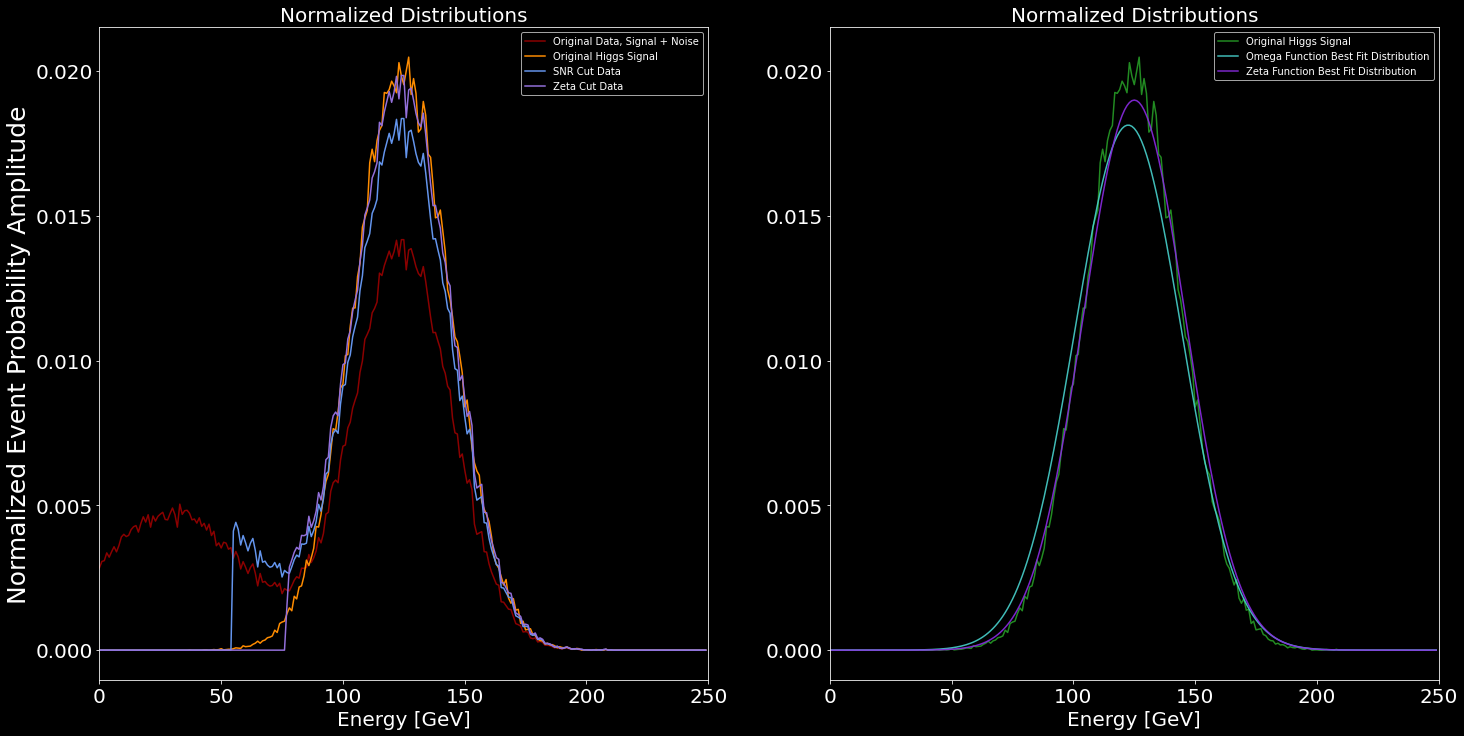

In [8]:
fig, axs = plt.subplots(1,2, figsize=(24,12))
axs[0].plot(data_histn[1][:-1],data_histn[0], color="darkred", label='Original Data, Signal + Noise')
axs[0].plot(sign[1][:-1], sign[0], color="darkorange", label="Original Higgs Signal")
axs[0].plot(cut_data_histn[1][:-1], cut_data_histn[0], color="cornflowerblue", label="SNR Cut Data")
axs[0].plot(zcut_data_histn[1][:-1], zcut_data_histn[0], color="mediumpurple", label="Zeta Cut Data")

axs[0].tick_params(labelsize=20)
axs[0].set_xlabel("Energy [GeV]", size=20)
axs[0].set_ylabel("Normalized Event Probability Amplitude", size=25) #Normalized meaning the sum of probabilties is unity.
axs[0].set_title("Normalized Distributions", size=20)
axs[0].set_xlim(0,250)
axs[0].legend()

axs[1].plot(sign[1][:-1], sign[0], color="forestgreen", label="Original Higgs Signal")
axs[1].plot(data_histn[1][:-1], Gauss(data_histn[1][:-1],Bestfit[0],Bestfit[1]), color="mediumturquoise", alpha=0.9, label="Omega Function Best Fit Distribution")
axs[1].plot(data_histn[1][:-1], Gauss(data_histn[1][:-1],Bestzfit[0].item(), Bestzfit[1].item()), color="blueviolet", alpha=0.9, label="Zeta Function Best Fit Distribution")
axs[1].tick_params(labelsize=20)
axs[1].set_xlabel("Energy [GeV]", size=20)
axs[1].set_title("Normalized Distributions", size=20)
axs[1].set_xlim(0,250)
axs[1].legend()
print("Higgs Distribution Parameters: 20.0, 125.0 GeV. Omega Function Best Fit Parameters: {}, {} GeV. Zeta Function Best Fit Parameters: {}, {} GeV.".format(Bestfit[0],Bestfit[1],Bestzfit[0].item(), Bestzfit[1].item()))
print("Due to normalization here, the functions won't align like they do in the below plots that show their absolute amplitudes.");

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(24,12))
axs[0].plot(data_hist[1][:-1], data_hist[0], color="yellow", label='Original Data, Signal + Noise')
axs[0].plot(sig[1][:-1], sig[0], color="purple", label="Original Higgs Signal")
axs[0].plot(nos[1][:-1], nos[0], color="purple", label="Original Noise Distribution")
axs[1].plot(data_hist[1][:-1], sig[0], color="purple", label="Original Higgs Signal")
axs[1].plot(data_hist[1][:-1], (sig_events)*Gauss(data_hist[1][:-1],Bestzfit[0].item(), Bestzfit[1].item()), color="green", alpha=0.9, label="Zeta Function Best Fit Distribution") #Scaled by Signal Event Counts
axs[1].plot(data_hist[1][:-1], (sig_events)*Gauss(data_hist[1][:-1],Bestfit[0],Bestfit[1]), color="blue", alpha=0.9, label="Omega Function Best Fit Distribution") #Scaled by Signal Event Counts
axs[0].tick_params(labelsize=20)
axs[1].tick_params(labelsize=20)
axs[0].set_xlabel("Energy [GeV]", size=20)
axs[0].set_ylabel("Event Counts [1/GeV]", size=25)
axs[1].set_xlabel("Energy [GeV]", size=20)
axs[0].plot(cut_data_hist[1][:-1], cut_data_hist[0], color="teal", label="SNR Cut Data")
axs[0].plot(zcut_data_hist[1][:-1], zcut_data_hist[0], color="azure", label="Zeta Cut Data")
axs[0].legend()
axs[1].legend()
axs[0].set_title("Absolute Distributions", size=20)
axs[1].set_title("Absolute Distributions", size=20)
axs[0].set_xlim(0,250)
axs[1].set_xlim(0,250)
;

''

In [ ]:
#Gradient Descent
guess_beta, step_size, iterations = [48.0, 115.0], 8000, 100 #Step sizes have to be considerably large here.
final_beta, beta_history, cost_history = Gradient_Descent(X,Y,guess_beta[0],guess_beta[1],step_size,iterations)
beta_x = []
beta_y = []
for beta in beta_history:
    beta_x.append(list(beta)[1])
    beta_y.append(list(beta)[0])

fig, axs = plt.subplots(1,3, figsize=(30,15))
axs[0].set_title("Contour Plot of the Cost Values", size=20)
axs[0].set_ylabel("σ, Standard Deviation", size=20)
axs[0].set_xlabel("μ, Median", size=20)
axs[0].tick_params(labelsize=15)
axs[0].contour(b2, b1, Omegadata, 150, cmap="viridis")
axs[0].scatter(Bestfit[1],Bestfit[0], color="purple", marker="*", label="Global Minima")
axs[0].scatter(guess_beta[1], guess_beta[0], color="yellow", marker="*", label="Intial Guess")
axs[0].scatter(beta_x,beta_y, color="green", alpha=0.6, marker="+", label="Gradient Descent Values")
axs[0].plot(beta_x,beta_y, color="green", alpha=0.4)
axs[0].legend(prop={'size':12}, loc='upper right')

axs[1].set_ylabel('Cost Values', size=20)
#axs[1].set_yscale("log")
axs[1].set_xlabel('Iteration', size=20)
axs[1].set_title("Cost Values vs Iteration", size=20)
axs[1].tick_params(labelsize=15)
axs[1].plot(range(len(cost_history)),cost_history,'b.')

axs[2].set_xlabel("Energy [GeV]", size=20)
axs[2].set_ylabel("Normalized Event Probability Amplitude", size=20) #Normalized meaning the sum of probabilties is unity.
axs[2].plot(cut_data_hist[1][:-1], Gauss(cut_data_hist[1][:-1],Bestfit[0],Bestfit[1]), color="blue", alpha=0.9, label="Omega Function Best Fit Distribution")
axs[2].plot(cut_data_hist[1][:-1], Gauss(cut_data_hist[1][:-1],final_beta[0],final_beta[1]), color="green", label="Gradient Descent: Omega Function Best Fit Distribution")
axs[2].plot(sign[1][:-1], sign[0], color="purple", label="Signal of Interest")
axs[2].plot(x, y/np.sum(y), color="teal", label='Inputted Data')

axs[2].legend(prop={'size':12},loc='upper right')

print("The global minimum in the Cost Data corresponds to the following best values, (σ,μ)=({},{}GeV).".format(Bestfit[0],Bestfit[1]))  
print("The Gradient Descent algorithim found the best fit values (σ,μ)=({},{}GeV).".format(round(final_beta[0],1),round(final_beta[1],1)));

In [ ]:
print("The Higgs Boson signal began as a gaussian distribution with the parameters (σ,μ)=({},{} GeV).".format(sig_std,sig_mean))
print("If we apply the cost function optimization to the dataset before we perform the SNR cut we find that the optimal parameters (the coordinates in parameter space the correspond to a global minimum) are (σ,μ)=({},{} GeV). ".format(Bestfitb[0],Bestfitb[1]))
print("If we use gradient descent to estimate the optimal parameters, we would find the approximate optimal parameters to be (σ,μ)=({},{} GeV), which should be reasonably close, however this isn't exactly neccesary nor is this the optimal approach.".format(round(final_beta[0],1),round(final_beta[1],1)))
print("If we apply the cost function optimization to the dataset after we peform the SNR cut we find the optimal parameters to be (σ,μ)=({},{} GeV), this is a considerably improvement and means the SNR step is neccesary.".format(Bestfit[0],Bestfit[1]))

def GradZetaData(X, Y, b1, b2, t3): 
    gZ_tensor, i_array, j_array = [], [], []
    for i in range(len(b1)):
        for j in range(len(b2)):
            for k in range(len(t3)):
                gZ = Zetagradient(X, Y, b1[i], b2[j], t3[k]).tolist()
                j_array.append(LA.norm(np.array(gZ))) #rename gZ to be delZ
            i_array.append(j_array)
        gZ_tensor.append(i_array)
    return gZ_tensor

### 